In [2]:
%reload_ext autoreload
%autoreload 2

from astroquery.gaia import Gaia
import astropy
import os
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils as ut
import plot_utils as pu

In [8]:
dist_pc = 100
par = 1e3/dist_pc

adql_query = f"""
SELECT dr3.ra, dr3.dec, dr3.parallax, dr3.phot_g_mean_mag, dr3.bp_rp, dr3.parallax_over_error,
dr3.astrometric_excess_noise, dr3.phot_bp_rp_excess_factor,
dr3.pmra, dr3.pmra_error, dr3.pmdec, dr3.pmdec_error, dr3.l, dr3.b
FROM gaiadr3.gaia_source AS dr3
WHERE dr3.parallax > {par}
AND dr3.parallax_over_error > 0
AND dr3.phot_bp_mean_flux_over_error > 10
AND dr3.phot_rp_mean_flux_over_error > 10
"""

job = Gaia.launch_job_async(adql_query)
data = job.get_results()


INFO: Query finished. [astroquery.utils.tap.core]


In [9]:
ra_dec = SkyCoord(ra=np.array(data['ra']) * u.degree, dec=np.array(data['dec']) * u.degree, frame='icrs')
ra, dec = ra_dec.ra, ra_dec.dec
ra_rad, dec_rad = ra.radian, dec.radian
ra_rad_wrap = ra.wrap_at(180 * u.deg).radian
colors_equatorial = np.log10(ut.get_hist_scatter_colors(ra_rad, dec_rad))

galactic = ra_dec.transform_to('galactic')
l_values, b_values = galactic.l, galactic.b  # Galactic longitude and latitude
l_rad_wrap = l_values.wrap_at(180 * u.deg).radian
l_rad, b_rad = l_values.radian, b_values.radian
colors_galactic = np.log10(ut.get_hist_scatter_colors(l_rad, b_rad))

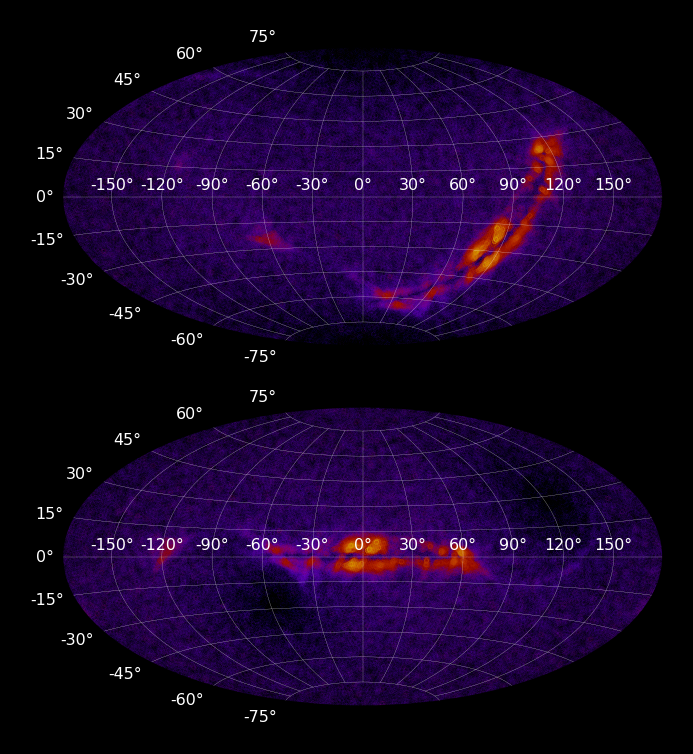

In [10]:
projection = 'aitoff'
size, rat = 720, 2
fig_w, fig_h = size*rat, size
subplots = (2, 1)
ts = 0.75
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h,
                                        theme=None, subplots=subplots, text_size=0.75)

fig.patch.set_facecolor('k')
for i in range(subplots[0]):
    for j in range(subplots[1]):
        axs[i][j] = fig.add_subplot(gs[i, j], projection=projection)
        axs[i][j].set_facecolor('k')
        axs[i][j].tick_params(colors="white")
        axs[i][j].xaxis.label.set_color("white")
        axs[i][j].yaxis.label.set_color("white")

        axs[i][j].grid(which="major", linewidth=fs * 0.015, color="white")
        axs[i][j].tick_params(
                axis="both",
                which="major",
                labelsize=1.5 * ts * fs,
                size=fs * 0.5,
                width=fs * 0.15,)
        
axs[0][0].scatter(ra_rad - np.pi, dec_rad, c=colors_equatorial, cmap='gnuplot', marker='o', s=0.00001*fs)
axs[1][0].scatter(l_rad_wrap, b_rad, c=colors_equatorial, cmap='gnuplot', marker='o', s=0.00001*fs)


# cluster_dic = ut.cluster_dic
# var = 'core_radius'
# for key in cluster_dic:
#     cluster = cluster_dic[key]
#     ra_center = cluster['ra_center']  *  np.pi /180 
#     dec_center = cluster['dec_center']   *  np.pi /180 
#     ang_radius = np.arctan(cluster[var]/cluster['distance']) 

#     phis = np.linspace(0, 2*np.pi, 100)
#     cxs = ra_center + ang_radius * np.cos(phis)
#     cys = dec_center + ang_radius * np.sin(phis)

#     plt.plot(cxs, cys, c='red', lw=0.1*fs)

# savefold = '../figures/'
# if not os.path.exists(savefold):
#     # create the folder if it does not exist
#     os.makedirs(savefold)
# figname = f'sky_view_{dist_pc}_pc.png'
# savepath = savefold + figname

# fig.savefig(savepath, dpi=300, bbox_inches='tight')

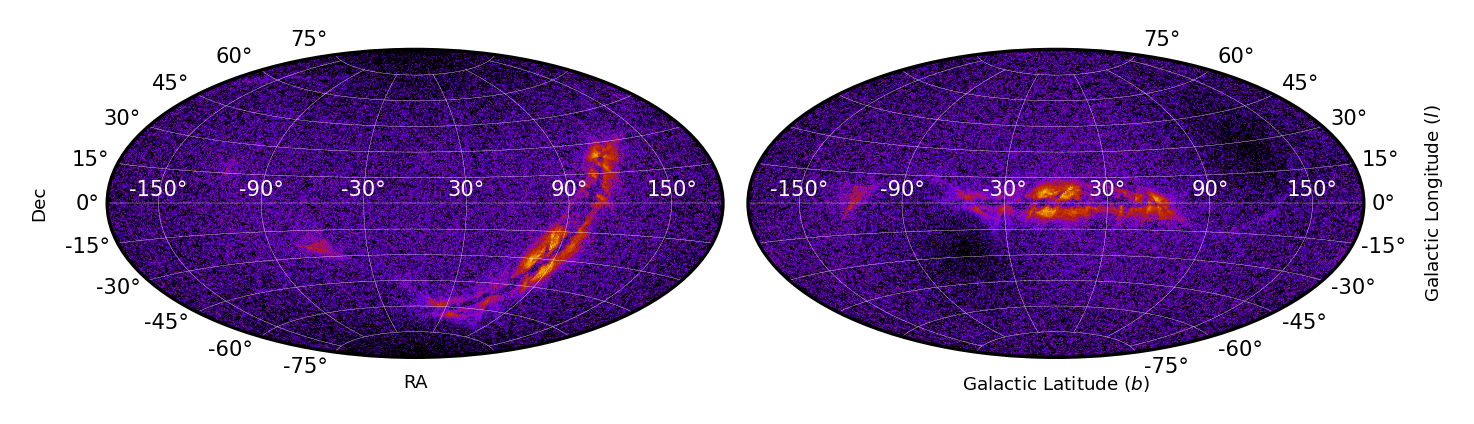

In [12]:
projection = 'aitoff'
size, rat = 720, 2
fig_w, fig_h = size*rat, size
subplots = (1, 2)
ts = 1
fig, axs, fs, gs = pu.initialize_figure(fig_w=fig_w, fig_h=fig_h,
                                        theme=None, subplots=subplots, text_size=0.75)

fig.patch.set_facecolor('white')
for i in range(subplots[0]):
    for j in range(subplots[1]):
        axs[i][j] = fig.add_subplot(gs[i, j], projection=projection)
        axs[i][j].set_facecolor('k')
        axs[i][j].tick_params(axis='x', colors="white")
        axs[i][j].xaxis.label.set_color("white")
        axs[i][j].yaxis.label.set_color("k")

        axs[i][j].grid(which="major", linewidth=fs * 0.025, color="white")
        axs[i][j].tick_params(
                axis="both",
                which="major",
                labelsize=1.5 * ts * fs,
                size=fs * 0,
                width=fs * 0.15,)

lbs = 1.3
axs[0][0].set_xlabel('RA', fontsize=fs*ts*lbs, color='k')
axs[0][0].set_ylabel('Dec', fontsize=fs*ts*lbs, color='k')

axs[0][1].set_xlabel('Galactic Latitude ($b$)', fontsize=fs*ts*lbs, color='k')
axs[0][1].set_ylabel('Galactic Longitude ($l$)', fontsize=fs*ts*lbs, color='k')
        
axs[0][0].scatter(ra_rad - np.pi, dec_rad, c=colors_equatorial, cmap='gnuplot', marker='o', 
s=0.01*fs, linewidths=0)
axs[0][1].scatter(l_rad_wrap, b_rad, c=colors_equatorial, cmap='gnuplot', marker='o', 
s=0.01*fs, linewidths=0)
# set axs[0][1] yaxis at right
axs[0][1].yaxis.tick_right()


# set xaxis labels to be [-150, -90, -30, 30, 90, 150]
axs[0][1].set_xticks(np.array([-150, -90, -30, 30, 90, 150])*np.pi/180)
axs[0][0].set_xticks(np.array([-150, -90, -30, 30, 90, 150])*np.pi/180)
axs[0][1].yaxis.set_label_position("right")


# cluster_dic = ut.cluster_dic
# var = 'core_radius'
# for key in cluster_dic:
#     cluster = cluster_dic[key]
#     ra_center = cluster['ra_center']  *  np.pi /180 
#     dec_center = cluster['dec_center']   *  np.pi /180 
#     ang_radius = np.arctan(cluster[var]/cluster['distance']) 

#     phis = np.linspace(0, 2*np.pi, 100)
#     cxs = ra_center + ang_radius * np.cos(phis)
#     cys = dec_center + ang_radius * np.sin(phis)

#     plt.plot(cxs, cys, c='red', lw=0.1*fs)

savefold = '../figures/'
if not os.path.exists(savefold):
    # create the folder if it does not exist
    os.makedirs(savefold)
figname = f'sky_view_{dist_pc}_pc_hor.png'
savepath = savefold + figname

fig.savefig(savepath, dpi=300, bbox_inches='tight')